### 1.0 Library Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.linear_model import *
from datetime import datetime
import time

### 2.0 Import Training Data



In [ ]:
# Import dataset
train = pd.read_csv('train_ML_IOT.csv')
test = pd.read_csv('test_ML_IOT.csv')

train.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


### 3.0 Cleaning the Data


#### 3.1 Data Exploration and Visualization

In [ ]:
train.describe

<bound method NDFrame.describe of                   DateTime  Junction  Vehicles           ID
0      2015-11-01 00:00:00         1        15  20151101001
1      2015-11-01 01:00:00         1        13  20151101011
2      2015-11-01 02:00:00         1        10  20151101021
3      2015-11-01 03:00:00         1         7  20151101031
4      2015-11-01 04:00:00         1         9  20151101041
...                    ...       ...       ...          ...
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]>

#### 3.2 Handle Duplicate Data

In [ ]:
# First we will remove duplicate rows
def removeDuplicates(data):
    # How many rows before removing duplicates?
    before = data.shape[0]
    print("There are ",before, "BEFORE removal")

    # Run duplicate removal
    data.drop_duplicates(keep="first", inplace=True) 

    #How many rows after removing duplicates
    after = data.shape[0]
    print("There are ",after, "AFTER removal")

    if (after == before):
      print("\nThere were no duplicates found")
    
    return data
  
train = removeDuplicates(train)
test = removeDuplicates(test)

There are  48120 BEFORE removal
There are  48120 AFTER removal

There were no duplicates found
There are  11808 BEFORE removal
There are  11808 AFTER removal

There were no duplicates found


#### 3.3 Handle Missing Data

In [ ]:
# Check if any data is missing, we could technically run this all at once, however, using a loop is better for documentaion purposes

def checkNullTotals(features, data):
  for i in features:
    totalNans = train[i].isnull().sum()
    print ('In the', i, 'column there are', totalNans, 'values missing')

features = ['DateTime', 'Junction', 'Vehicles', 'ID']
checkNullTotals(features, train)
checkNullTotals(features, test)
#There are no values missing, therefore, we will not need to run feed-forward, backward, or mean replacement algorithms

In the DateTime column there are 0 values missing
In the Junction column there are 0 values missing
In the Vehicles column there are 0 values missing
In the ID column there are 0 values missing
In the DateTime column there are 0 values missing
In the Junction column there are 0 values missing
In the Vehicles column there are 0 values missing
In the ID column there are 0 values missing


#### 3.4 Feature Handling

3.4.1 Feature Selection

Feature selection attempts to reduce number of variables in training data. This is helpful for increasing the accuracy and reducing the cost of a model. Morover, in classification problems, feature selection helps to only choose k number of features with weights that affect a classification label meaningfully. However, in this case our dataset does not have an excess of dimensions or'features'. Also, the problem of predicting traffic as a result of time is not that of classification. Therefore, we do not need to run feature selection in this workflow. 

3.4.2 Feature Creation

Due to the lack of features in the dataset, we do not have to run feature selection, however, feature creation is necessary.

In [ ]:
# Subroutine to creat Unix Timestamp Feature (Column)
def dateToUnix(df):
    # Initialising unixtime list
    unixtime = []
    df['DateTime'] = pd.to_datetime(train['DateTime'])
    # Running a loop for converting Date to seconds
    for i in df['DateTime']:    
        unixtime.append(time.mktime(i.timetuple()))
    
    #Add unixtime label
    df['UnTime'] = unixtime
    return(df)

train = dateToUnix(train)
test = dateToUnix(test)

In [ ]:
train['Hour'] = [((date.hour+(date.minute)))+date.second for date in train.DateTime]
train['Weekday'] = [datetime.weekday(date) for date in train.DateTime]
train['Day'] = [date.day for date in train.DateTime]
train['Month'] = [date.month for date in train.DateTime]

test['Hour'] = [((date.hour+(date.minute)))+date.second for date in test.DateTime]
test['Weekday'] = [datetime.weekday(date) for date in test.DateTime]
test['Day'] = [date.day for date in test.DateTime]
test['Month'] = [date.month for date in test.DateTime]



#### 3.5 Data Visualization

3.5.1 Pair Plot

In [138]:

sns.pairplot(train)

Error in callback <function flush_figures at 0x0000023920065040> (for post_execute):


KeyboardInterrupt: 

In [ ]:
train.head(100)

,DateTime,Junction,Vehicles,ID,UnTime,Hour,Weekday,Day,Month
0,2015-11-01 00:00:00,1,15,20151101001,1.446350e+09,0,6,1,11
1,2015-11-01 01:00:00,1,13,20151101011,1.446358e+09,1,6,1,11
2,2015-11-01 02:00:00,1,10,20151101021,1.446361e+09,2,6,1,11
3,2015-11-01 03:00:00,1,7,20151101031,1.446365e+09,3,6,1,11
4,2015-11-01 04:00:00,1,9,20151101041,1.446368e+09,4,6,1,11
...,...,...,...,...,...,...,...,...,...
95,2015-11-04 23:00:00,1,24,20151104231,1.446696e+09,23,2,4,11
96,2015-11-05 00:00:00,1,19,20151105001,1.446700e+09,0,3,5,11
97,2015-11-05 01:00:00,1,20,20151105011,1.446703e+09,1,3,5,11
98,2015-11-05 02:00:00,1,18,20151105021,1.446707e+09,2,3,5,11


3.5.2 Histogram of Vehicles vs Time

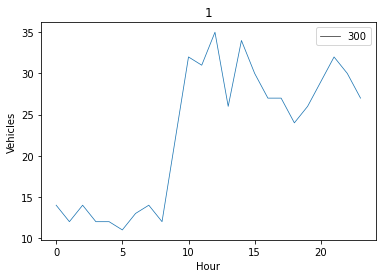

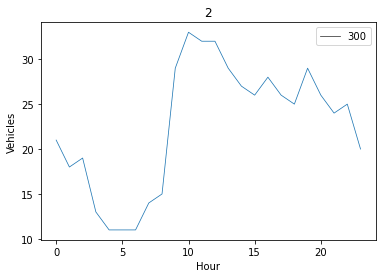

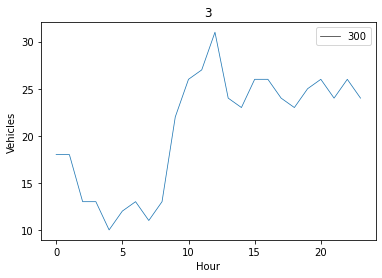

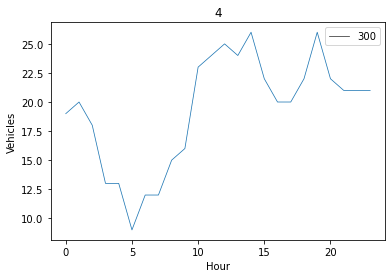

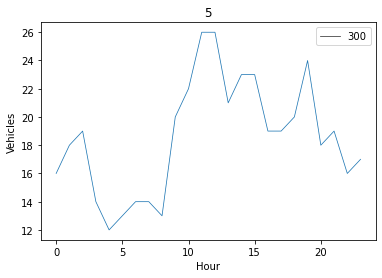

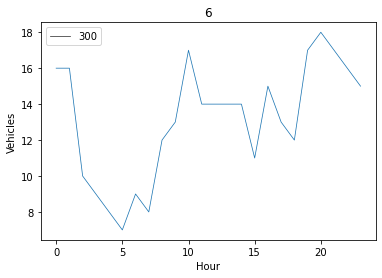

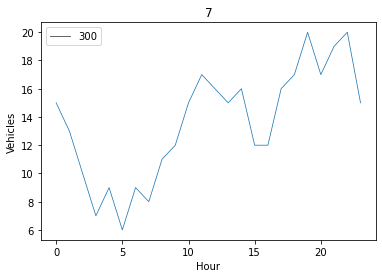

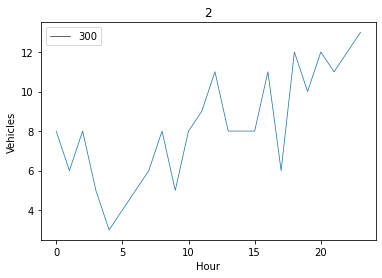

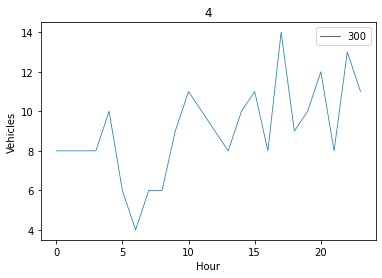

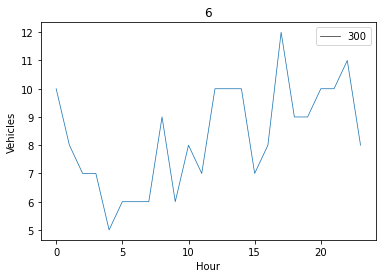

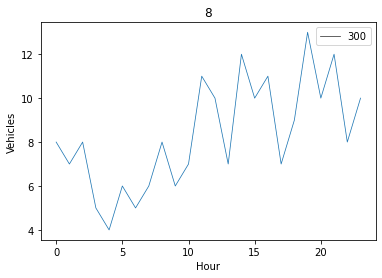

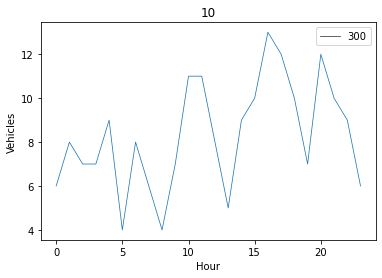

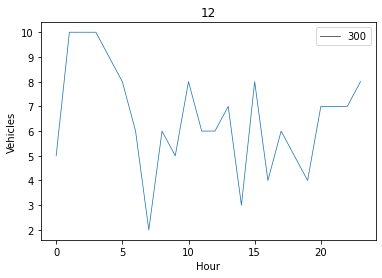

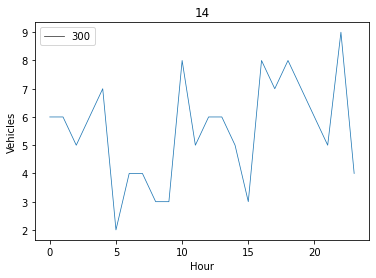

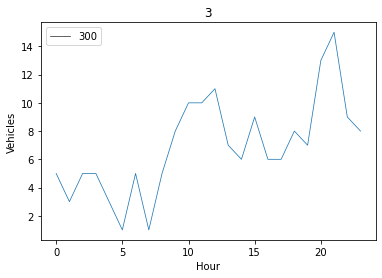

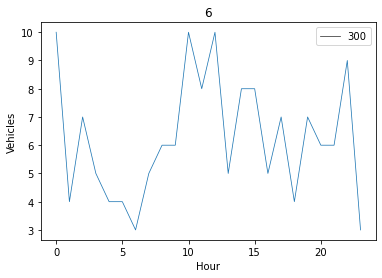

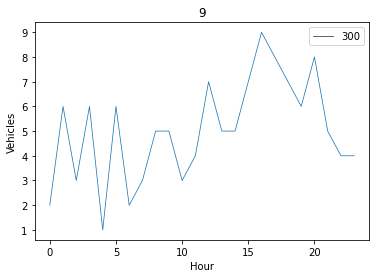

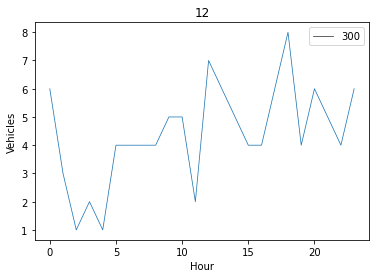

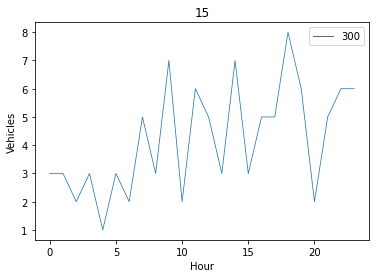

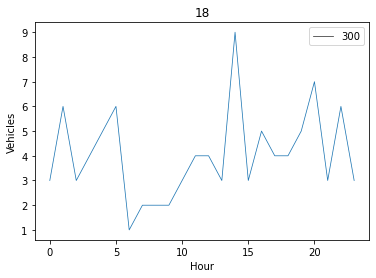

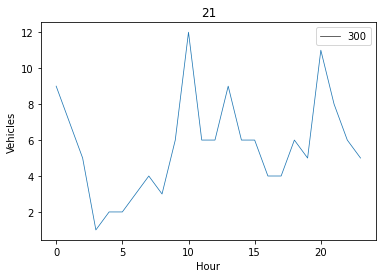

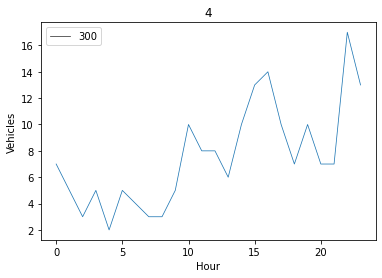

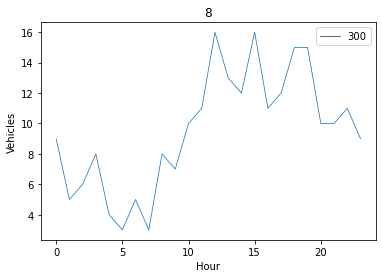

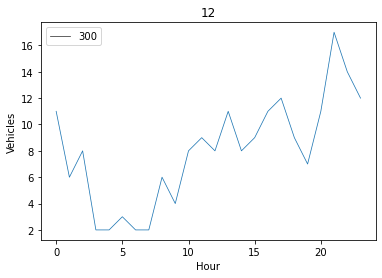

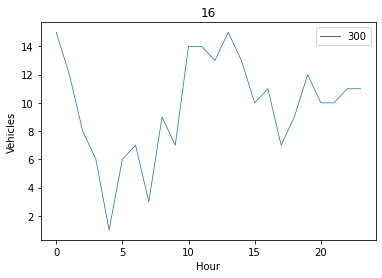

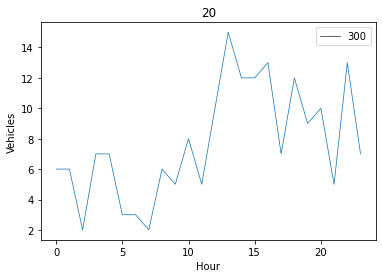

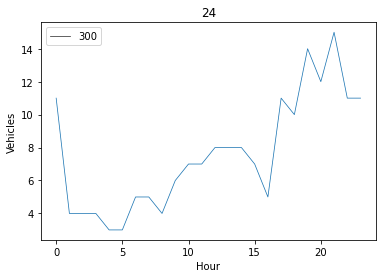

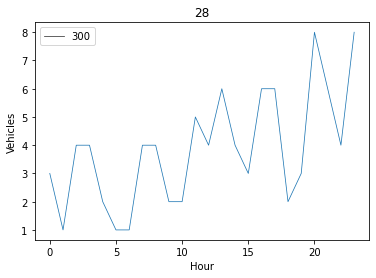

In [ ]:
for i in range(4):
    for j in range(7):
        temp = train[train.Junction == i+1]
        temp = temp[temp.Weekday == j]
        temp = temp.head(24)

        tempPlot = sns.lineplot(x='Hour', y="Vehicles", data=temp, size=300)
        plt.title((j+1)*(i+1))
        plt.show()

# 4.0 Short Term Traffic Prediction

## 4.1 Model Creation

In [143]:
X = train[['Hour', 'Weekday','Day','Month']]
y = train['Vehicles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)

In [146]:
# Linear Regression model
reg = LinearRegression().fit(X_train, y_train)
score = reg.score(X_test, y_test)

0.6391520218000613
